In [0]:
import numpy
from keras.datasets import mnist
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import np_utils

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

X_train/=255
X_test/=255

number_of_classes = 10
Y_train = np_utils.to_categorical(Y_train, number_of_classes)
Y_test = np_utils.to_categorical(Y_test, number_of_classes)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


In [0]:
def DigitClassificationModel(input_shape):
    X_input = Input(input_shape, name = "input")
    
    X = Conv2D(16, (5, 5), strides = (1, 1), padding = 'same', name = 'conv0')(X_input)
    X = MaxPooling2D(pool_size = (2, 2), name = 'max_pool_0')(X)
    X = Activation('relu', name = 'relu_0')(X)
    
    X = Conv2D(32, (3, 3), strides = (1, 1), padding = 'same', name = 'conv1')(X)
    X = MaxPooling2D(pool_size = (2, 2), name = 'max_pool_1')(X)
    X = Activation('relu', name = 'relu_1')(X)
    
    X = Flatten(name = 'flatten')(X)
    X = Dense(256, activation = 'relu', name = 'fc0')(X)
    X = Dense(number_of_classes, activation='softmax', name = 'fc1')(X)
    
    model = Model(inputs = X_input, outputs = X, name='Digit Classification')
        
    return model

In [0]:
model = DigitClassificationModel((X_train.shape[1], X_train.shape[2], X_train.shape[3]))

model.compile(loss='categorical_crossentropy', optimizer = 'sgd' , metrics = ['accuracy'])

In [0]:
#model.fit(X_train, Y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

model.fit(X_train, Y_train, epochs = 1, batch_size = 5)

Epoch 1/1
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1768 - acc: 0.9443


In [0]:
model.save('mnistCNN.h5')

In [0]:
preds = model.evaluate(X_test, Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

10000/10000 [==============================] - 1s 113us/step

Loss = 0.06452827122583986
Test Accuracy = 0.9796


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 16)        416       
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 14, 14, 16)        0         
_________________________________________________________________
relu_0 (Activation)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 7, 7, 32)          0         
_________________________________________________________________
relu_1 (Activation)          (None, 7, 7, 32)          0         
__________

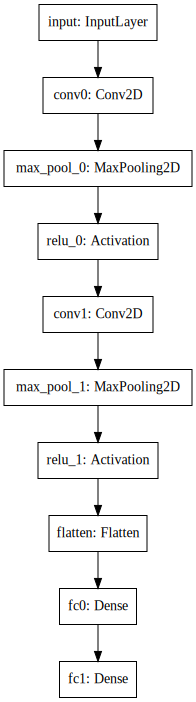

In [0]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))